In [1]:
# %matplotlib_svg
%pylab inline
# import numpy as np
# from matplotlib import pyplot as plt
from matplotlib import collections as mc

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.path.pardir, '..', 'codes')))

## 塊、路徑和集合

### Path與Patch

In [3]:
rect_patch = plt.Rectangle((0, 1), 2, 1)
rect_path = rect_patch.get_path()
# %C 
rect_path.vertices

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 0.,  1.],
       [ 0.,  0.]])

In [4]:
rect_path.codes

array([ 1,  2,  2,  2, 79], dtype=uint8)

In [5]:
tran = rect_patch.get_patch_transform()
tran.transform(rect_path.vertices)

array([[ 0.,  1.],
       [ 2.,  1.],
       [ 2.,  2.],
       [ 0.,  2.],
       [ 0.,  1.]])

> **SOURCE**

> `scpy2.matplotlib.svg_path`：從SVG檔案中取得簡單的路徑訊息。可以使用該模組將向量繪圖軟體建立的圖形轉為`Patch`物件。

In [6]:
# #%fig=使用本書提供的read_svg_path()讀入SVG檔案中的路徑並顯示為Patch物件
# from scpy2.matplotlib.svg_path import read_svg_path

# ax = plt.gca()
# patches = read_svg_path("python-logo.svg")
# for patch in patches:
#     ax.add_patch(patch)

# ax.set_aspect("equal")
# ax.invert_yaxis()
# ax.autoscale();

### 集合

#### 曲線集合(LineCollection)

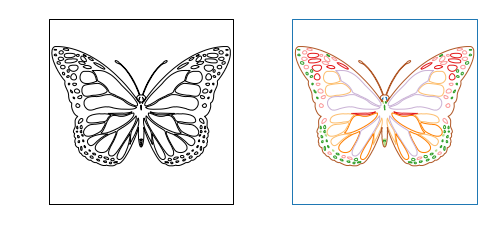

In [7]:
#%fig=使用LineCollection顯示大量曲線
from matplotlib import collections as mc
lines = []
with open("butterfly.txt", "r") as f:
    for line in f:
        points = line.strip().split()
        points.extend(points[:2]) # ❶
        points = np.array(points).reshape(-1, 2) # ❷
        lines.append(points)
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
lc1 = mc.LineCollection(lines, colors="k", linewidths=1) # ❸
lc2 = mc.LineCollection(lines, cmap="Paired", linewidths=1, # ❹
                        array=np.log2(np.array([len(line) for line in lines])))
ax1.add_collection(lc1)
ax2.add_collection(lc2)

for ax in ax1, ax2:
    ax.set_aspect("equal")
    ax.autoscale()
    ax.axis("off")

In [8]:
print("number of lc1 paths:", len(lc1.get_paths()))
print("number of lc1 colors:", len(lc1.get_edgecolors()))
print("number of lc2 colors:", len(lc2.get_edgecolors()))
print(np.all(lc2.get_edgecolors() == lc2.cmap(lc2.norm(lc2.get_array()))))

number of lc1 paths: 145
number of lc1 colors: 1
number of lc2 colors: 145
True


In [9]:
print(lc1.get_transforms()) # 路徑變換
print(lc1.get_transform() is ax1.transData) # 主變換為資料座標變換物件
print(lc1.get_offset_transform(), lc1.get_offsets())

[]
True
IdentityTransform() [[ 0.  0.]]


In [10]:
from scipy.integrate import odeint

def field(s, t):
    x, y = s
    return 0.3 * x - y, 0.3 * y + x
    return [u, v]

X, Y = np.mgrid[-2:2:5j, -2:2:5j]
init_pos = np.c_[X.ravel(), Y.ravel()]
t = np.linspace(0, 5, 50)

streams = []
for pos in init_pos:
    r = odeint(field, pos, t)
    streams.append(r)

print(len(streams), streams[0].shape)

25 (50, 2)


In [11]:
# %hide
# %matplotlib_png

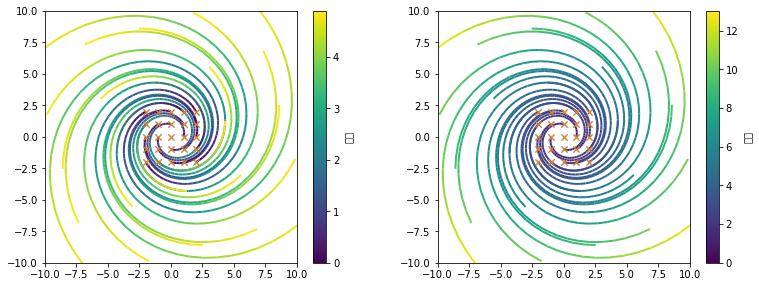

In [12]:
#%fig=使用LineCollection繪制彩色漸層的曲線
lines = np.concatenate([
    np.concatenate((r[:-1, None, :], r[1:, None, :]), axis=1)
    for r in streams], axis=0)

time_value = np.concatenate([t[:-1]] * len(streams))
x, y = lines.mean(axis=1).T
u, v = field([x, y], 0)
speed_value = np.sqrt(u ** 2 + v ** 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))
fig.subplots_adjust(0, 0, 1, 1)
ax1.plot(init_pos[:, 0], init_pos[:, 1], "x")
ax2.plot(init_pos[:, 0], init_pos[:, 1], "x")

lc1 = mc.LineCollection(lines, linewidths=2, array=time_value)
lc2 = mc.LineCollection(lines, linewidths=2, array=speed_value)

ax1.add_collection(lc1)
ax2.add_collection(lc2)

plt.colorbar(ax=ax1, mappable=lc1, label=u"時間")
plt.colorbar(ax=ax2, mappable=lc2, label=u"速度")

for ax in ax1, ax2:
    ax.plot(init_pos[:, 0], init_pos[:, 1], "x")
    ax.autoscale()
    ax.set_aspect("equal")
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

In [13]:
#%hide
# %matplotlib_svg

#### 多邊形集合(PolyCollection)

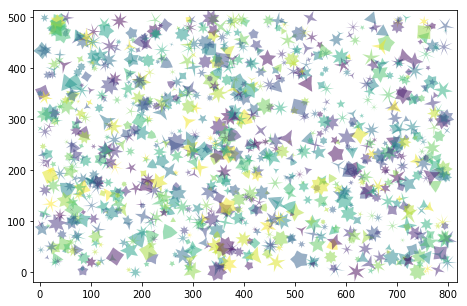

In [14]:
#%fig=用PolyCollection繪制大量多邊形
from numpy.random import randint, rand, uniform

def star_polygon(x, y, r, theta, n, s): 
    angles = np.arange(0, 2*np.pi, 2*np.pi/2/n) + theta
    xs = r * np.cos(angles)
    ys = r * np.sin(angles)
    xs[1::2] *= s
    ys[1::2] *= s
    xs += x
    ys += y
    return np.vstack([xs, ys]).T

stars = []
for i in range(1000):
    star = star_polygon(randint(800), randint(500), 
                        uniform(5, 20), uniform(0, 2*np.pi),
                        randint(3, 9), uniform(0.1, 0.7))
    stars.append(star)

fig, ax = plt.subplots(figsize=(10, 5))
polygons = mc.PolyCollection(stars, alpha=0.5, array=np.random.rand(len(stars)))
ax.add_collection(polygons)
ax.autoscale()
ax.margins(0)
ax.set_aspect("equal")

In [24]:
print("length of facecolors:", len(polygons.get_facecolors()))
print("length of edgecolors:", len(polygons.get_edgecolors()))

length of facecolors: 1000
length of edgecolors: 0


#### 路徑集合(PathCollection)

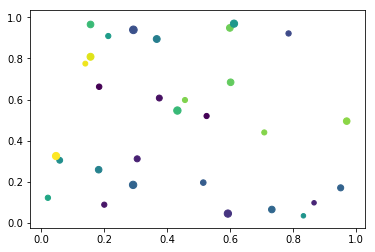

In [25]:
#%nofig
N = 30
np.random.seed(42)
x = np.random.rand(N)
y = np.random.rand(N)
size = np.random.randint(20, 60, N)
value = np.random.rand(N)

fig, ax = plt.subplots()
pc = ax.scatter(x, y, s=size, c=value)

In [26]:
print(pc.get_transforms().shape)
print(pc.get_transforms()[0]) #索引為0的點對應的縮放矩陣

(30, 3, 3)
[[ 5.91607978  0.          0.        ]
 [ 0.          5.91607978  0.        ]
 [ 0.          0.          1.        ]]


In [27]:
print(pc.get_offsets()[0]) #索引為0的點對應的中心座標
#計算索引為0的點對應的螢幕座標
print(pc.get_offset_transform().transform(pc.get_offsets())[0])
print(pc.get_offset_transform() is ax.transData)

[ 0.37454012  0.60754485]
[ 183.11070309  165.76179348]
True


In [28]:
print(pc.get_transform())

IdentityTransform()


In [29]:
pc.get_offset_position()

'screen'

#### 橢圓集合(EllipseCollection)

(-5, 5, -5, 5)

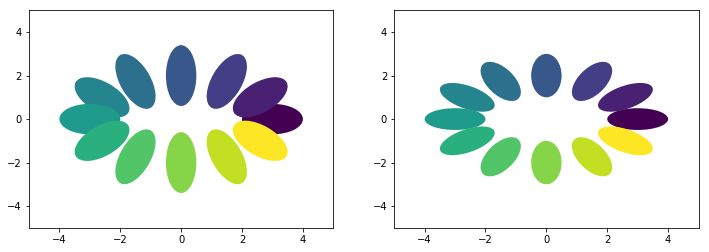

In [21]:
#%fig=`EllipseColletion`的`unit`參數：`unit='x'`（左圖）、`unit='xy'`（右圖）
angles = np.linspace(0, 2*np.pi, 12, endpoint=False)
offsets = np.c_[3*np.cos(angles), 2*np.sin(angles)]
angles_deg = np.rad2deg(angles)
widths = np.full_like(angles, 2)
heights = np.full_like(angles, 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ec0 = mc.EllipseCollection(widths, heights, angles_deg, units="x", array=angles,
                          offsets=offsets, transOffset=axes[0].transData)
axes[0].add_collection(ec0)
axes[0].axis((-5, 5, -5, 5))

ec1 = mc.EllipseCollection(widths, heights, angles_deg, units="xy", array=angles,
                          offsets=offsets, transOffset=axes[1].transData)
axes[1].add_collection(ec1)
axes[1].axis((-5, 5, -5, 5))
#axes[1].set_aspect("equal");

#### 資料空間中的圓形集合物件

In [22]:
from matplotlib.collections import CircleCollection, Collection
from matplotlib.transforms import Affine2D

class DataCircleCollection(CircleCollection):

    def set_sizes(self, sizes):
        self._sizes = sizes

    def draw(self, render):
        ax = self.axes
        ms = np.zeros((len(self._sizes), 3, 3))
        ms[:, 0, 0] = self._sizes
        ms[:, 1, 1] = self._sizes
        ms[:, 2, 2] = 1
        self._transforms = ms #❶

        m = ax.transData.get_affine().get_matrix().copy()
        m[:2, 2:] = 0
        self.set_transform(Affine2D(m)) #❷

        return Collection.draw(self, render)

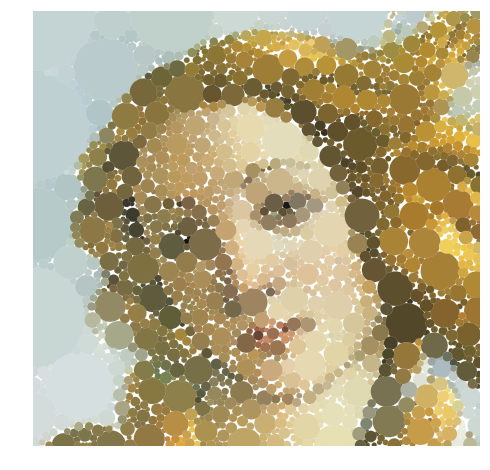

In [31]:
#%fig=使用DataCircleCollection繪制大量的圓形
data = np.loadtxt("venus-face.csv", delimiter=",")
offsets = data[:, :2]
sizes = data[:, 2] * 1.05
colors = data[:, 3:] / 256.0

fig, axe = plt.subplots(figsize=(8, 8))
axe.set_rasterized(True)
cc = DataCircleCollection(sizes, facecolors=colors, edgecolors="w", linewidths=0.1,
                          offsets=offsets, transOffset=axe.transData)

axe.add_collection(cc)
axe.axis((0, 512, 512, 0))
axe.axis("off");